In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/house_price_regression_dataset.csv")

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
df.size

8000

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.dtypes

,0
Square_Footage,int64
Num_Bedrooms,int64
Num_Bathrooms,int64
Year_Built,int64
Lot_Size,float64
Garage_Size,int64
Neighborhood_Quality,int64
House_Price,float64


In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
x=df.drop(columns='House_Price')
x

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


In [ ]:
y=df['House_Price']
y

,House_Price
0,2.623829e+05
1,9.852609e+05
2,7.779774e+05
3,2.296989e+05
4,1.041741e+06
...,...
995,7.014940e+05
996,6.837232e+05
997,5.720240e+05
998,9.648653e+05


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
multi_lr = LinearRegression()
multi_lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = multi_lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
y_pred = multi_lr.predict(x_test)

print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

MSE : 93402164.14686958
RMSE : 9664.479507292133
MAE : 7649.627541457138
R2 score : 0.998528286227121


**DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr =DecisionTreeRegressor(criterion='squared_error', min_samples_split=4,max_depth=1000)
dtr.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=1000, min_samples_split=4)

In [ ]:
y_pred = dtr.predict(x_test)

In [ ]:
print("MSE : " , mean_squared_error(y_test,y_pred))
print("RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE : " , mean_absolute_error(y_test,y_pred))
print("R Squared : ", r2_score(y_test,y_pred))

MSE :  1149343553.6352477
RMSE :  33901.969760402535
MAE :  26987.901224871755
R Squared :  0.981890090523011


In [ ]:
dtr_r2 = r2_score(y_test,y_pred)

**RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train , y_train)
y_pred = rfr.predict(x_test)

In [ ]:
print("MSE : " , mean_squared_error(y_test,y_pred))
print("RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE : " , mean_absolute_error(y_test,y_pred))
print("R Squared : ", r2_score(y_test,y_pred))

MSE :  495785333.27038515
RMSE :  22266.237519401097
MAE :  17202.98929922136
R Squared :  0.9921880385745872


In [ ]:
rfr_r2 = r2_score(y_test,y_pred)

**SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(x_train , y_train)
y_pred = svr.predict(x_test)

In [ ]:
print("MSE : " , mean_squared_error(y_test,y_pred))
print("RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE : " , mean_absolute_error(y_test,y_pred))
print("R Squared : ", r2_score(y_test,y_pred))

MSE :  758691026.3245548
RMSE :  27544.346540162373
MAE :  22563.364638442472
R Squared :  0.9880455014827516


In [ ]:
svr_r2 = r2_score(y_test,y_pred)

**r2 comparison**

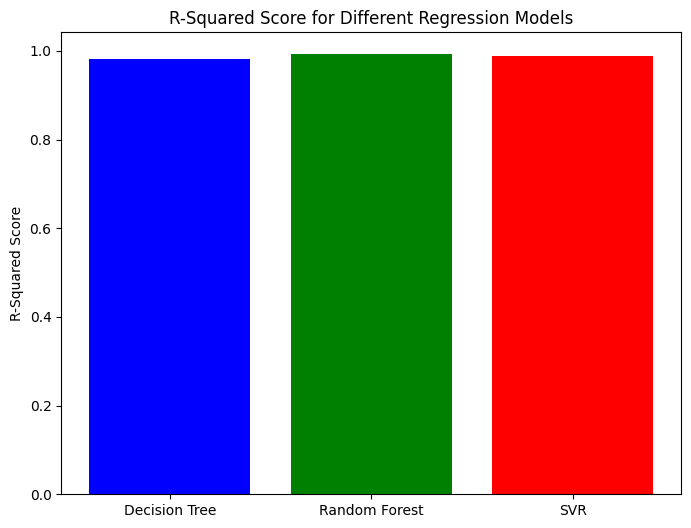

In [ ]:
import matplotlib.pyplot as plt

models = ['Decision Tree' , 'Random Forest' , 'SVR']
r2_scores = [dtr_r2 , rfr_r2,svr_r2]

plt.figure(figsize=(8,6))
plt.bar(models,r2_scores, color = ['blue','green','red'])
plt.ylabel("R-Squared Score")
plt.title("R-Squared Score for Different Regression Models")
plt.show()

In [ ]:
import joblib

joblib.dump(sc,'scaler.pkl')

joblib.dump(rfr , 'random_forest_model.pkl')

['random_forest_model.pkl']